In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
def print_images(images, size=250):
  images = [cv2.resize(img, (size, size)) for img in images]
  vis = np.concatenate(images, axis=1)
  cv2_imshow(vis)

# Предобработка изображения

In [ ]:
!curl https://i.imgur.com/rG7OUyS.png > conveyor.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  115k  100  115k    0     0   215k      0 --:--:-- --:--:-- --:--:--  215k


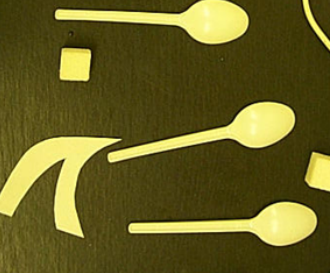

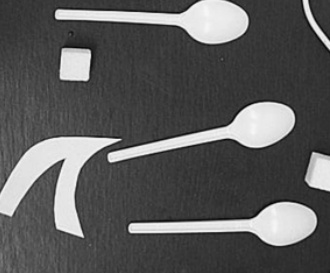

In [ ]:
conveyor = cv2.imread('/content/conveyor.jpg')
gray_conveyor = cv2.cvtColor(conveyor, cv2.COLOR_BGR2GRAY)
cv2_imshow(conveyor)
cv2_imshow(gray_conveyor)

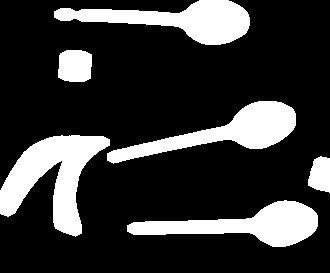

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
conveyor_er = cv2.erode(gray_conveyor, kernel, iterations=2)
conveyor_dil = cv2.dilate(conveyor_er, kernel, iterations=3)

spoons_ret, conveyor_thresh = cv2.threshold(conveyor_dil, 200, 255, cv2.THRESH_BINARY)
cv2_imshow(conveyor_thresh)


In [ ]:
conveyor_labels = cv2.connectedComponents(conveyor_thresh, connectivity=4, ltype=cv2.CV_16U)

# Обучение решающего дерева

In [ ]:
objects = conveyor_labels[0]
map = conveyor_labels[1]
S = []

for obj in range(1, objects):
  s = 0
  for pixel in np.nditer(map):
    if pixel == obj:
      s += 1
  S.append(s)

# 0 - ложка, 1 - не ложка
labels = [1, 2, 1, 2, 2, 1]
print(S)
print(labels)

[4158, 980, 4136, 5144, 636, 4073]
[1, 2, 1, 2, 2, 1]


In [ ]:
import numpy as np
from sklearn import tree

X = np.array(S).reshape(-1, 1)
y = np.array(labels).reshape(-1, 1)

clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[0] <= 2526.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 4651.0\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

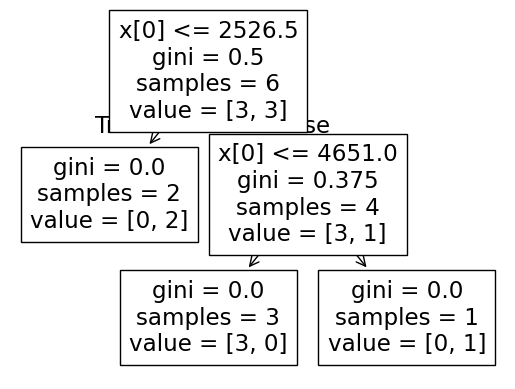

In [ ]:
tree.plot_tree(clf)

In [ ]:
print(clf.predict([[4100]]))

[1]


# Тестирование

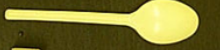

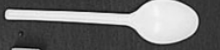

In [ ]:
# spoons = cv2.imread('/content/spoons.png', cv2.IMREAD_GRAYSCALE)
test_conveyor = cv2.imread('/content/conveyor.jpg')
gray_spoon = gray_conveyor[0:50, 50:270]
spoon = test_conveyor[0:50, 50:270]
cv2_imshow(spoon)
cv2_imshow(gray_spoon)

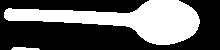

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
spoon_er = cv2.erode(gray_spoon, kernel, iterations=7)
spoon_dil = cv2.dilate(gray_spoon, kernel, iterations=1)

spoon_ret, spoon_thresh = cv2.threshold(spoon_dil, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(spoon_thresh)

spoon_labels = cv2.connectedComponents(spoon_thresh, connectivity=4, ltype=cv2.CV_16U)

In [ ]:
objects = spoon_labels[0]
map = spoon_labels[1]

S = []

for obj in range(1, objects):
  s = 0
  for pixel in np.nditer(map):
    if pixel == obj:
      s += 1
  S.append(s)

print(S)

[4046, 69]


In [ ]:
classes = clf.predict(np.array(S).reshape(-1, 1))
print(classes)
print(objects)

[1 2]
3


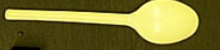

In [ ]:
for obj in range(1, objects):
  for row in range(spoon.shape[0]):
    for column in range(spoon.shape[1]):
      if map[row, column] == obj and classes[obj - 1] == 2:
        spoon[row, column] = [0, 0, 0]

cv2_imshow(spoon)